In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
%matplotlib inline

import os
import pandas_datareader.data as web

In [93]:
# the index is column 2 which is the date
walmart = pd.read_csv("../../../Data & Script/tommywilczek-walmart/walmart.csv", index_col=2)
# only use store 1
walmart = walmart.loc[walmart.Store == 1]
walmart = walmart[['Store','Dept','Weekly_Sales']].dropna()
# set index
#walmart = walmart.set_index('Date', append=False, inplace=True)
# convert index to datetime
walmart.index = pd.to_datetime(walmart.index)
walmart.sort_index(inplace=True)
walmart.head()

,Store,Dept,Weekly_Sales
Date,,,
2010-02-05,1,1.0,24924.50
2010-02-05,1,26.0,11737.12
2010-02-05,1,17.0,13223.76
2010-02-05,1,45.0,37.44
2010-02-05,1,28.0,1085.29


Read these

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://tomaugspurger.github.io/modern-7-timeseries

https://www.ethanrosenthal.com/2018/01/28/time-series-for-scikit-learn-people-part1/

In [94]:
sns.set(style='ticks', context='talk')
if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep

In [95]:
# resample every 10 days
walmart.resample("10d").mean().head()

,Store,Dept,Weekly_Sales
Date,,,
2010-02-05,1,43.593103,22659.643724
2010-02-15,1,43.616438,22081.755753
2010-02-25,1,43.806897,20445.063931
2010-03-07,1,43.616438,19719.747808
2010-03-17,1,43.569444,19978.789653


In [96]:
y = walmart.Weekly_Sales
#y.index.name = 'date'
#y = y.resample('5T').last()
y.head()

Date
2010-02-05    24924.50
2010-02-05    11737.12
2010-02-05    13223.76
2010-02-05       37.44
2010-02-05     1085.29
Name: Weekly_Sales, dtype: float64

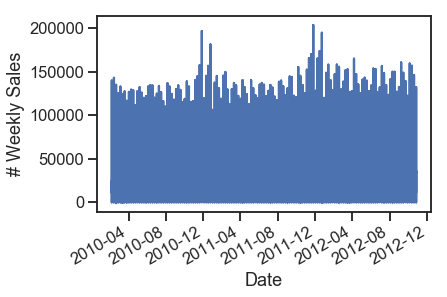

In [97]:
ax = y.plot();
ax.set_ylabel('# Weekly Sales');

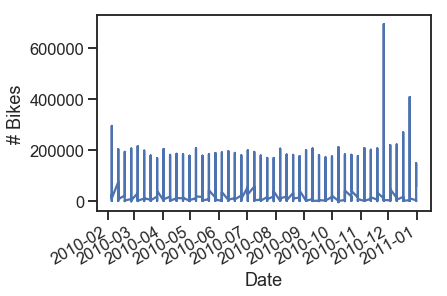

In [86]:
y.loc['2010'].plot();
plt.ylabel('# Bikes');